# Optimal Portfolio
This notebook construct 3 different optimal portfolios. The maximum sharpe-ratio portfolio (*simple risk adjusted return*), the maximum calmar-ratio portfolio (*maximum drawdown adjusted return*) and the minimum variance portfolio.

\begin{align}
    \text{Sharpe Ratio}&=\frac{R_{p}-R_{f}}{\sigma_{p}}\\
    \text{Calmar Ratio}&=\frac{R_{p}-R_{f}}{\text{Maximum Drawdown}}
\end{align}
where $R_{p}$ denotes the portfolio's annualized return, $R_{f}$ denotes the risk-free interest rate, $\sigma_{p}$ denotes the standard deviation ($\approx$*risk*) of the portfolio and maximum drawdown is measured as the pct.-change from trough to peak, i.e. peak-value minus trough-value divided by peak-value.




In [1]:
############## Loading relevant packages ##############
import numpy as np
import pandas as pd
import datetime as dt
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# local module
import pftools
import VaR_and_ES as vares
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

## Loading and cleaning data
In this notebook, data can be fetched using the downloaded CSV-files or using the yahoo database.

In [2]:
# pick which tickers to use in the analysis.
# Make sure names are compatible with yahoo database or file-name
tickers = ['SXR8', 'XACTC25', 'XDJP', 'LCUA' ,'SXRP', 'SXRL', 'XJSE'] # stock and bonds ETFs
tickers = ['SXR8', 'XACTC25', 'XDJP', 'LCUA'] # only stock ETFs

# getting data from a local csv-file
df, rdf, cdf = pftools.df_generator(tickers,'csv','C:/Users/olufk/OneDrive/Documents/GitHub/PortfolioDesign/PortfolioDesign/OptimalPF/Data_Investing_com/')

Will eventually output description of each ticker in df


In [58]:
# pick which tickers to use in the analysis.
# Make sure names are compatible with yahoo database or file-name
tickers = ['FORTUM.HE', 'SAF.PA', 'WM','AMD', 'ASML.AS', 'FB', 'SE', '600887.SS', 'SHOP']

# enter time period of interest
start = dt.datetime(2014, 6, 30)
end = dt.datetime(2019, 6, 30)

# getting data from yahoo database
df, rdf, cdf = pftools.df_generator(tickers,'yahoo')

No starttime selected, has therefore chosen default closest to (5 years before today) 2016-09-12
No endtime selected, has therefore chosen default which is the latest trading day 2021-09-11
Will eventually output description of each ticker in df


## Describing each tickers
Now that data is loaded, it's time to get an idea of the characteristics of the tickers

C:\Users\olufk\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\olufk\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\olufk\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\olufk\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


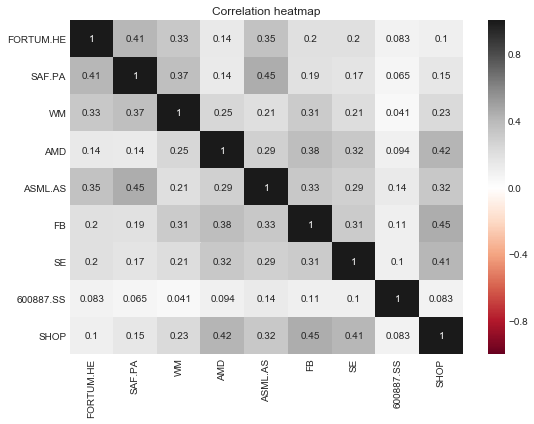

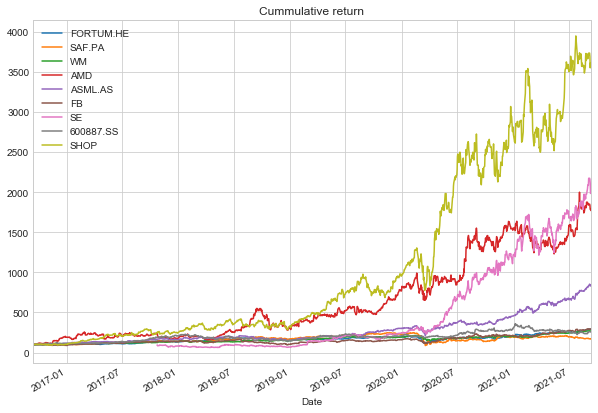

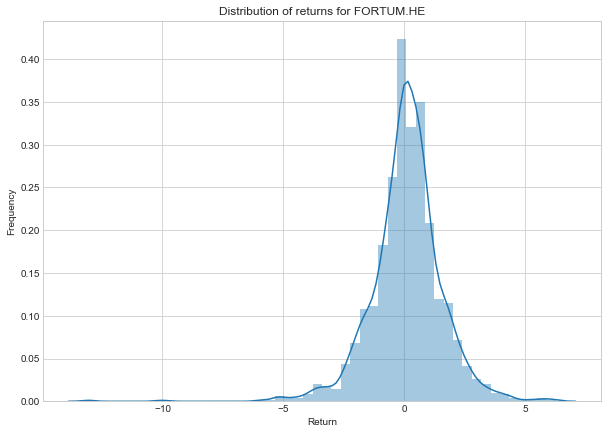

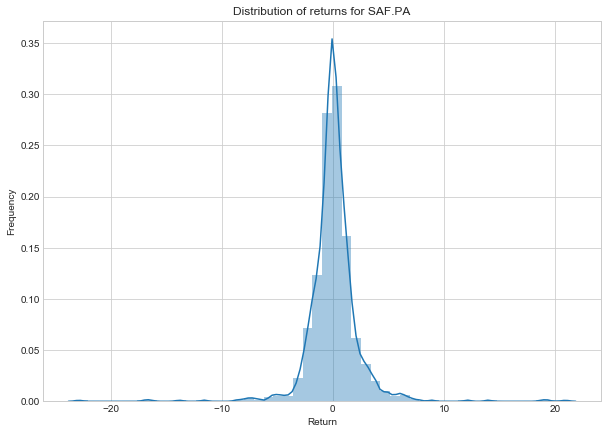

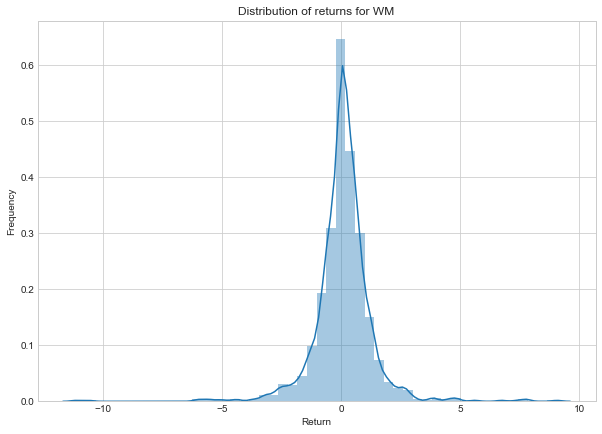

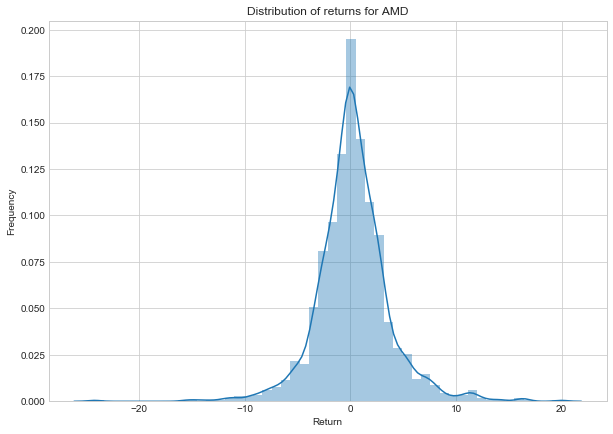

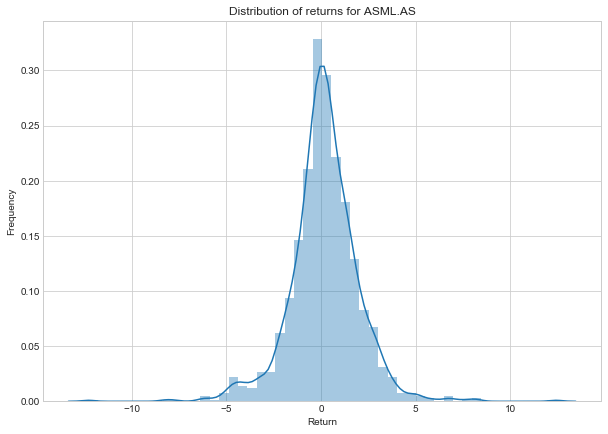

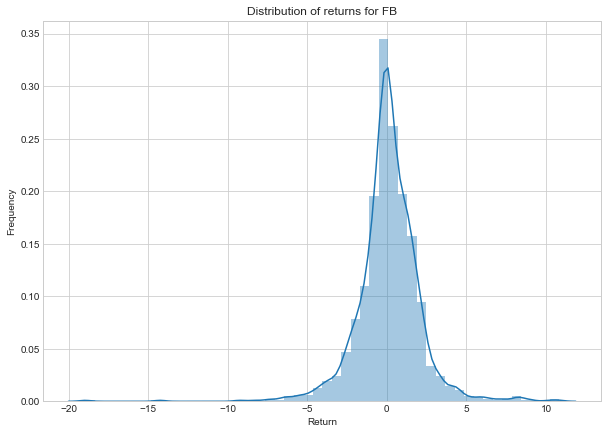

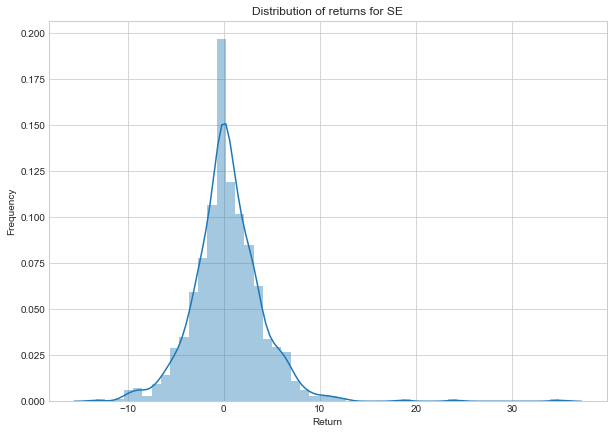

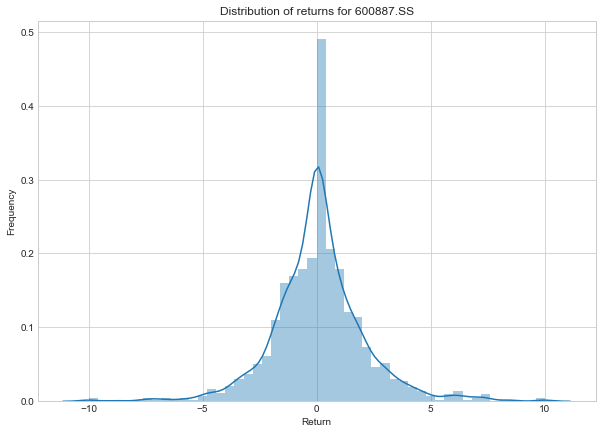

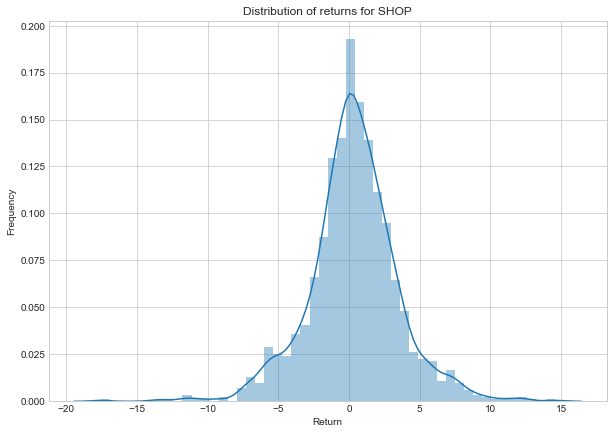

,Ticker,annualized_return,volatility,sharpe_ratio,calmar_ratio
0,FORTUM.HE,15.73,23.57,0.67,0.39
1,SAF.PA,7.90,36.97,0.21,0.13
2,WM,14.67,20.07,0.73,0.50
3,AMD,48.75,55.81,0.87,1.06
4,ASML.AS,34.25,28.93,1.18,0.98
5,FB,16.08,32.12,0.50,0.49
6,SE,70.14,58.30,1.20,2.54
7,600887.SS,14.05,32.71,0.43,0.70
8,SHOP,63.84,50.54,1.26,1.62


In [66]:
pftools.desc_ticks(df,rdf,cdf)

In [60]:
omega_hat, alpha_hat, ll = vares.ARCH1_est('SE',df)

Estimating SE as a ARCH(1)-model resulted in:
--------------------------------------------------------------------------------------
Omega^hat                       --> 12.3061 with std. errors (0.3788) and t-val 32.4909
alpha^hat                       --> 0.0596 with std. errors (0.0427) and t-val 1.3936
Maximized log-likelihood        --> -3639.962
--------------------------------------------------------------------------------------


Risk measures for SE at 2 period losses with a 0.05 risk level is
-----------------------------------------
Gauss
-----
VaR                             --> 8.38
ES                              --> 10.51
-----------------------------------------
ARCH(1)
------
VaR (average)                   --> 8.39
ES  (average)                   --> 10.54
-----------------------------------------


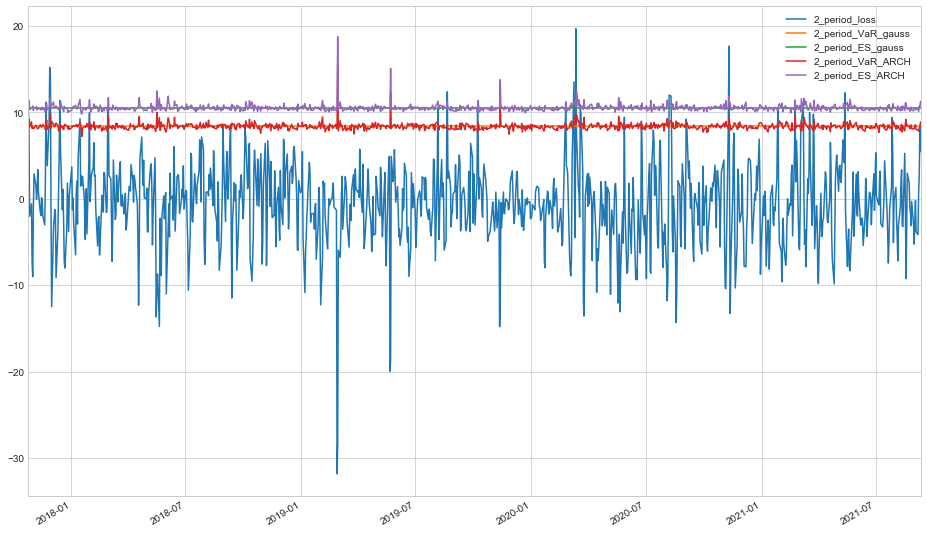

In [61]:
vares_df = vares.VaRES(omega_hat,alpha_hat,df,'SE',0.05,2,2000)
vares_df.plot(figsize = (16,10));

In [71]:
pftools.ana_optimal_portfolios(df)

-----------------------------------------------------------------------------------------------

The analytical solution for the minimum variance portfolio (allows for shorting) resulted in:

           weight
ticker           
FORTUM.HE   23.74
SAF.PA      -5.21
WM          45.66
AMD         -1.74
ASML.AS     14.15
FB           7.60
SE          -2.77
600887.SS   17.91
SHOP         0.65

With portfolio characteristics:

               stats
variance      234.58
std            15.32
return         21.24
sharpe-ratio    1.39

-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------

The analytical solution for the efficient tangent portfolio (allows for shorting) resulted in:

           weight
ticker           
FORTUM.HE   19.70
SAF.PA     -25.68
WM          36.97
AMD          3.85
ASML.AS     44.05
FB         -18.13
SE          11.52
600887.SS   10.25
S

In [73]:
pftools.num_optimal_portfolios(df,20,True)

SHORTING IS ALLOWED
Will numerically solve the minimum variance portfolio

Multistart optimizing - prints every time the optimal solution improves 
-----------------------------------------------------------------------------------------------
Attempt 1 of 20 - minvar portfolio - with w0 (initial guess) = [0.14, -0.85, 0.22, 0.79, 0.09, 0.41, -0.23, 0.3, 0.38]

Weights converged at [0.24, -0.05, 0.46, -0.02, 0.14, 0.08, -0.03, 0.18, 0.01] with variance = 234.58.


Attempt 4 of 20 - minvar portfolio - with w0 (initial guess) = [-0.07, 0.04, -0.88, 0.67, 0.14, 0.02, -0.96, 0.7, 0.95]

Weights converged at [0.24, -0.05, 0.46, -0.02, 0.14, 0.08, -0.03, 0.18, 0.01] with variance = 234.58.


Attempt 5 of 20 - minvar portfolio - with w0 (initial guess) = [-0.71, 0.34, 0.67, 0.38, 0.93, -0.97, 0.81, 0.34, 0.17]

Weights converged at [0.24, -0.05, 0.46, -0.02, 0.14, 0.08, -0.03, 0.18, 0.01] with variance = 234.58.


Attempt 6 of 20 - minvar portfolio - with w0 (initial guess) = [-0.28, -0.62, -

In [74]:
pftools.num_optimal_portfolios(df,20,False)

SHORTING IS NOT ALLOWED
Will numerically solve the minimum variance portfolio

Multistart optimizing - prints every time the optimal solution improves 
-----------------------------------------------------------------------------------------------
Attempt 1 of 20 - minvar portfolio - with w0 (initial guess) = [0.57, 0.08, 0.61, 0.9, 0.54, 0.7, 0.39, 0.65, 0.69]

Weights converged at [0.22, 0.0, 0.43, 0.0, 0.11, 0.06, 0.0, 0.18, 0.0] with variance = 240.00.


Attempt 2 of 20 - minvar portfolio - with w0 (initial guess) = [0.72, 0.69, 0.81, 0.28, 0.76, 0.31, 0.44, 0.55, 0.43]

Weights converged at [0.22, 0.0, 0.43, 0.0, 0.11, 0.06, 0.0, 0.18, 0.0] with variance = 240.00.


Attempt 5 of 20 - minvar portfolio - with w0 (initial guess) = [0.14, 0.67, 0.83, 0.69, 0.96, 0.02, 0.9, 0.67, 0.58]

Weights converged at [0.22, 0.0, 0.43, 0.0, 0.11, 0.06, 0.0, 0.18, 0.0] with variance = 240.00.


-----------------------------------------------------------------------------------------------

The min

In [31]:
# logrdf = np.log(df).diff().dropna()*100
# logrdf = np.log(df).diff()*100
# sigma = logrdf.cov()*252
# mu = logrdf.mean()*252
# # testdf = (df/df.shift(21)-1)*100
# # drawdown = np.abs(testdf.min())
# # print(drawdown)
# # print(mu)

# # calmarratio = mu/drawdown
# # calmarratio
# logrdf
# sigma
# mu
# def desc(df):
#     logrdf = np.log(df).diff*100
#     sigma = logrdf.cov()*252
#     mu = logrdf.mean()*252
    

#     monthlyreturn = (df/df.shift(21)-1)*100
#     drawdown = monthlyreturn.min()
#     calmarratio = mu / drawdown


,SXR8,XACTC25,XDJP,LCUA
Date,,,,
2010-05-28,92.80,NaN,NaN,NaN
2010-05-31,92.79,NaN,NaN,NaN
2010-06-01,92.32,NaN,NaN,NaN
2010-06-02,91.78,NaN,NaN,NaN
2010-06-04,91.56,NaN,NaN,NaN
2010-06-07,90.16,NaN,NaN,NaN
2010-06-08,89.38,NaN,NaN,NaN
2010-06-29,90.23,NaN,NaN,NaN
2010-07-06,86.99,NaN,NaN,NaN
